In [41]:
#将需要的库都加载进来
import string
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 首先让我们概览数据结构，了解下各字段

In [42]:
df_Train = pd.read_csv('/Users/siteng/Documents/GitHub/Kaggle-Titanic/train.csv')
df_Train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


通过前20行的数据概览，我们可以来理解所有字段的含义：
* 1：**PassengerId** 乘客ID
* 2：**Survived** 是否在沉船后活下来
* 3：**Pclass** 乘客舱级
* 4：**Name** 乘客性别
* 5：**Sex** 性别
* 6：**Age** 年龄
* 7：**SibSp** Sib代表sibling，Sp代表spouse，乘客兄弟姐妹及子女的数量
* 8：**Parch** Par代表parent，ch代表children，乘客父母及小孩的数量
* 9：**Ticket** 票号
* 10：**Fare** 票价
* 11：**Cabin** 舱位
* 12：**Embarked** 上船的位置

In [43]:
df_Train.info()#再检查下字段中有没有异常\难处理的数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


从这里我们可以看出船上一共包含891名乘客，而有些数据比如**年龄（Age）**则存在缺失，尤其是具体的**舱位（Cabin）**有很多缺失，联想到电影《泰坦尼克号》中逃票的剧情，这些数据的缺失并不难理解；  
**生还率（Survived）**虽然是int整数类型，但实质上它的取值只有0或1，可以转换为布尔（Boolean）类型；  
**舱位（Pclass）**貌似只有1-3三个舱位，但不确定；  
**性别（Sex）**只有两个值male或female；  
**SibSp**和**Parch**这两个字段的值大多为0，根据现实情况一般来说不会出现过大的数(>10)；**上船（Embarked）**的位置为S\C\Q  
由于只检查了开头的20行数据，我对Pclass, Survived, SibSp, Parch, Embarked这几个字段各值的可能性还没有最终确定，我决定检查一下。

In [44]:
#先用age做个测试：  
df_Age = df_Train.iloc[:,5:6]   
l_Age = df_Age.to_numpy()  
l_unique_Age = np.unique(l_Age)  
print(l_unique_Age)  
#证明此段代码可以用在其他字段中，而且间接提醒了我，到作图的时候，需要将年龄Age中的空缺值填补上！

[ 0.42  0.67  0.75  0.83  0.92  1.    2.    3.    4.    5.    6.    7.
  8.    9.   10.   11.   12.   13.   14.   14.5  15.   16.   17.   18.
 19.   20.   20.5  21.   22.   23.   23.5  24.   24.5  25.   26.   27.
 28.   28.5  29.   30.   30.5  31.   32.   32.5  33.   34.   34.5  35.
 36.   36.5  37.   38.   39.   40.   40.5  41.   42.   43.   44.   45.
 45.5  46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   55.5
 56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   66.   70.
 70.5  71.   74.   80.     nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   n

In [45]:
#我们一个一个来测试
df_Pclass = df_Train.iloc[:,2:3]           #取所有的Pclass数据
l_Pclass = df_Pclass.to_numpy()            #将其从dataframe转换成list
l_unique_Pclass = np.unique(l_Pclass)      #取其中所有唯一值
print(l_unique_Pclass)                     #将结果打印

[1 2 3]


和我的猜想一致，舱级Pclass确实只有1/2/3三种舱级

In [46]:
df_Survived = df_Train.iloc[:,1:2]             #取所有的Survived数据
l_Survived = df_Survived.to_numpy()            #将其从dataframe转换成list
l_unique_Survived = np.unique(l_Survived)      #取其中所有唯一值
print(l_unique_Survived)                       #将结果打印

[0 1]


确实没有异常值，只有0或1，死亡或生还

In [47]:
df_SibSp = df_Train['SibSp']              #取所有的SibSp数据
l_SibSp = df_SibSp.to_numpy()             #将其从dataframe转换成list
l_unique_SibSp = np.unique(l_SibSp)       #取其中所有唯一值
print(l_unique_SibSp)                     #将结果打印

[0 1 2 3 4 5 8]


这个也和我的猜想基本一致，没有自己兄弟姐妹+子女超过10人的家庭

In [48]:
df_Parch = df_Train['Parch']              #取所有的Parch数据
l_Parch = df_Parch.to_numpy()             #将其从dataframe转换成list
l_unique_Parch = np.unique(l_Parch)       #取其中所有唯一值
print(l_unique_Parch)                     #将结果打印

[0 1 2 3 4 5 6]


和上段代码一样，没有自己父母+子女超过10人的家庭

In [49]:
df_Embarked = df_Train['Embarked']              #取所有的Embarked数据
l_Embarked = df_Embarked.to_numpy()             #将其从dataframe转换成list
s_unique_Embarked = set(l_Embarked)             #由于值不是int，我们可以将其转换成集合
l_unique_Embarked = list(s_unique_Embarked)     #再从集合转化成list
print(l_unique_Embarked)                        #将结果打印

[nan, 'C', 'Q', 'S']


果然，只有S/Q/C三个上船点，并且证实有些缺失的数据

### 详细了解了数据类型后，我们可以运用Matplotlib进行数据可视化

In [50]:
df_Train.describe() #利用describe()看下各字段

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


几个比较重要的数据：
* 存活率：38.38%  
* 平均年龄：29.7岁
* 舱级：在三等舱的比一等和二等多很多
* 兄弟姐妹及子女：平均约2人会带一个
* 父母和小孩：平均2.6人会带一个
* 票价：平均为32美元，最大512美元和二十五分位数的7.9美元相差甚远  
虽然我们可以了解到一些数据，这些数据看起来并不直观，我们接下来利用matplotlib, pandas, seaborn来画图

##### 别忘记补充一些需要计算的却缺失数据的字段

In [51]:
df_Train['Age'] = df_Train['Age'].fillna(df_Train['Age'].median())   #取中位值补全数据
df_Train['Fare'] = df_Train['Fare'].fillna(df_Train['Fare'].mean())  #取平均值补全数据
df_Train.head(20)  #总之前head(20)中原来有空缺值，现在再看一下

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
#设置下画图的字体
font = {'family' : 'Serif',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

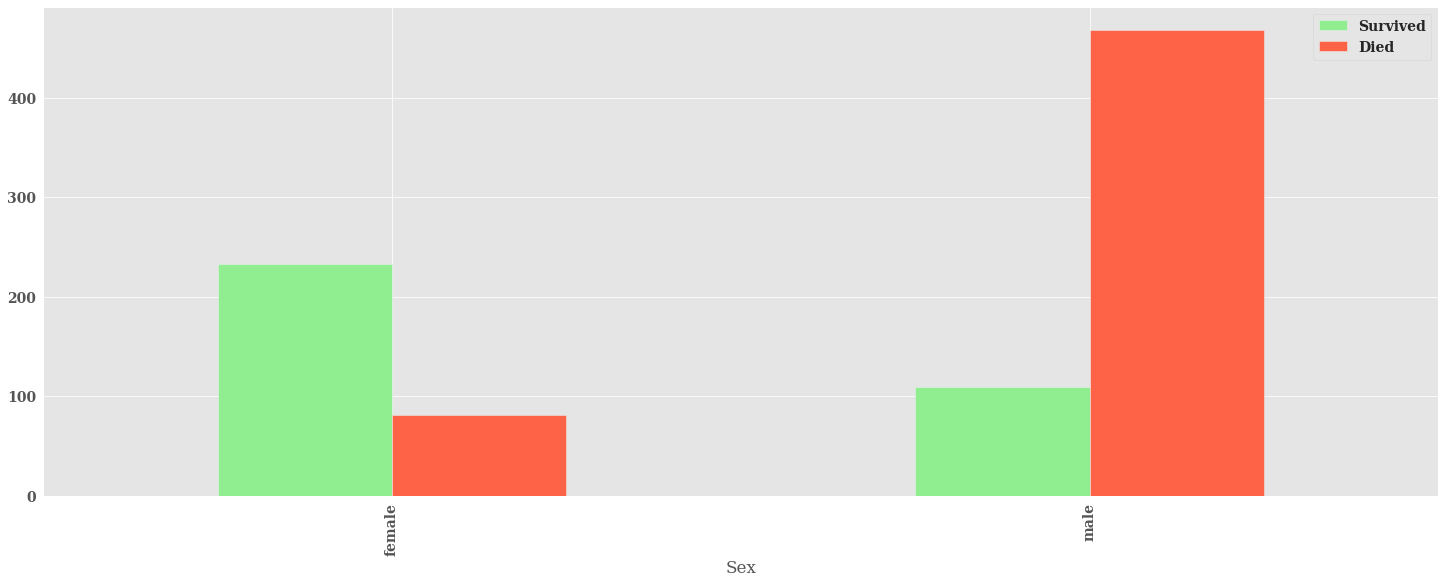

In [53]:
df_Train['Died'] = 1 - df_Train['Survived']
df_Train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 9),
color=['lightgreen', 'tomato'])

从这里我们不难看出：  
* 1. 男性数量远大于女性（甚至男性死亡人数大于女性总人数）
* 2. 男性的死亡率远高于女性死亡率
* 3. 男性的生还率非常低  

我们可以结合当时的情景：在电影泰坦尼克号中，船撞击冰山时，由于救生艇不够用，副船长说先救***女人***和小孩，而现在的数据证明确实女性生存率更高，这之间确实有一定联系。

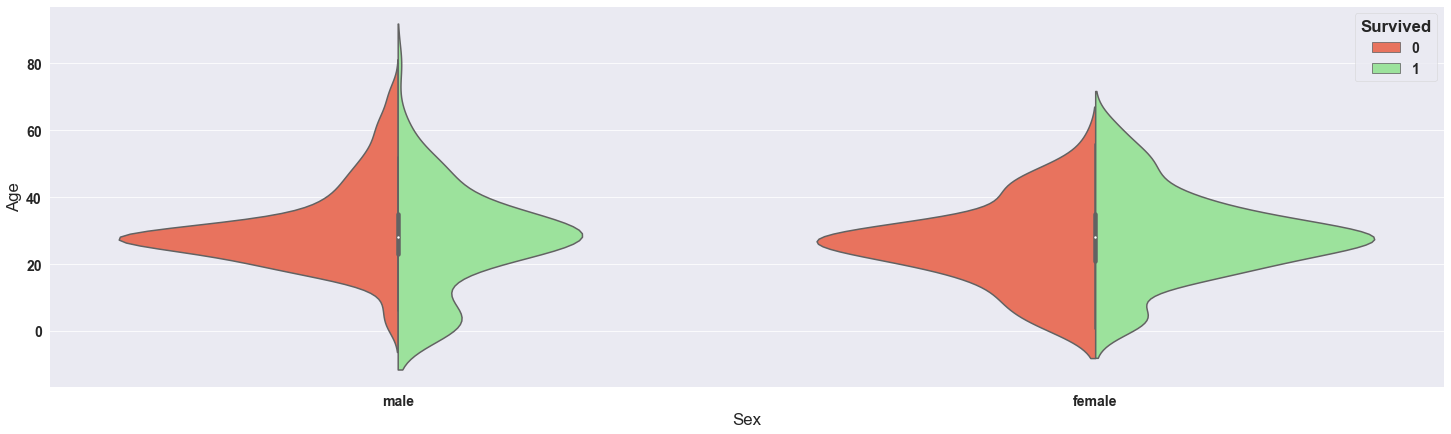

In [54]:
#前面的猜想中除了女人还有小孩，那么我们再来看下年龄+性别对死亡率的影响
fig = plt.figure(figsize=(25, 7))
sns.set_style("darkgrid")
sns.violinplot(x='Sex', y='Age',  hue='Survived', data=df_Train, split=True,
palette={0: "tomato", 1: "lightgreen"});

小提琴图是箱线图与核密度图的结合，我们可以通过比较垂直中线两侧的长短来表示在一特定年龄男性或女性的人数及死亡率，从此图我们可以比较直观的看出：
* 1. 中年男性数量最多，但是存活率却是最低的
* 2. 未成年（18以下）的男生女生数量差别不大，但未成年女生生还率相比未成年男生低很多
* 3. 男性中非常老的人（75+）仅占男性总数量的很小一部分，但成活率非常的高，几乎全部存活
* 4. 死亡最多的年龄群组大概在**20-40**岁左右  

这从侧面几个方面又印证了当时船上**“先救女人和孩子“**的说法。

联想起电影中救生艇不够，也许只有有钱人才能上救生艇的说法，我们再来看看人们的阶级地位对生存率的影响：

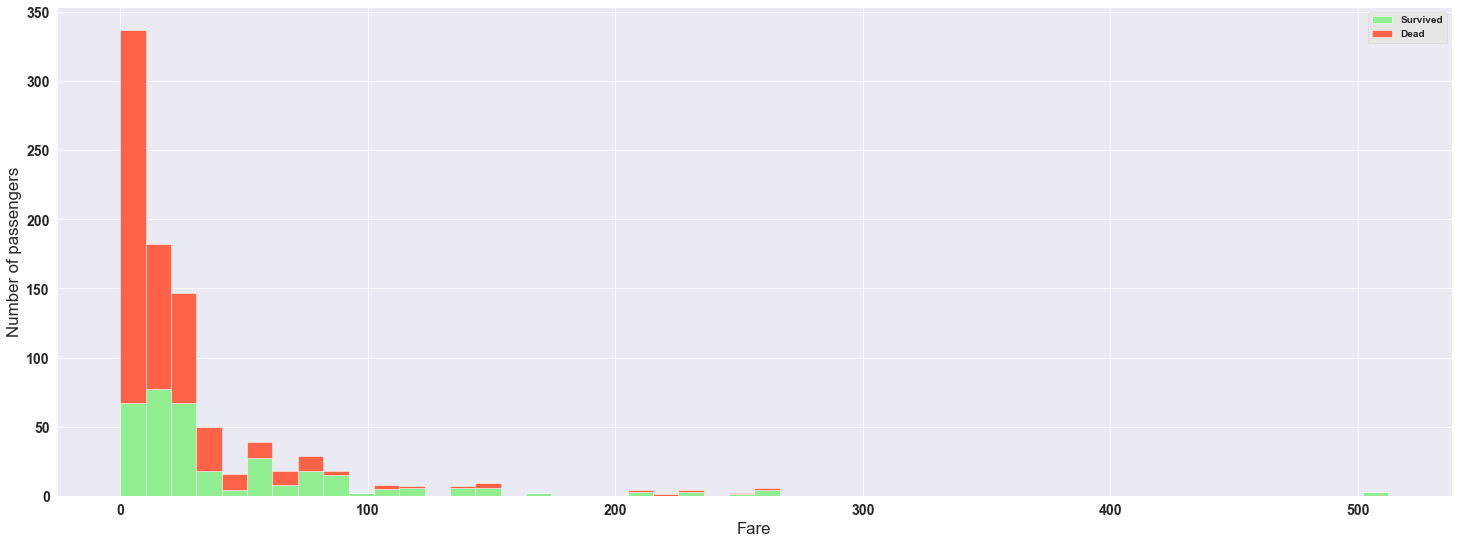

In [55]:
figure = plt.figure(figsize=(25, 9))
plt.hist([df_Train[df_Train['Survived'] == 1]['Fare'], df_Train[df_Train['Survived'] == 0]['Fare']], 
stacked=True, color = ['lightgreen','tomato'], bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.style.use('ggplot')
plt.ylabel('Number of passengers')
plt.legend();

从这个直方图我们可以看出：
* 1. 持有低价票的乘客存活率非常的低
* 2. 持有约30美元以上乘客的存活率大大增加  
我们也可以做出一个猜想：票价和舱级应该是有关联的！  

下面我们来做图证明一下：

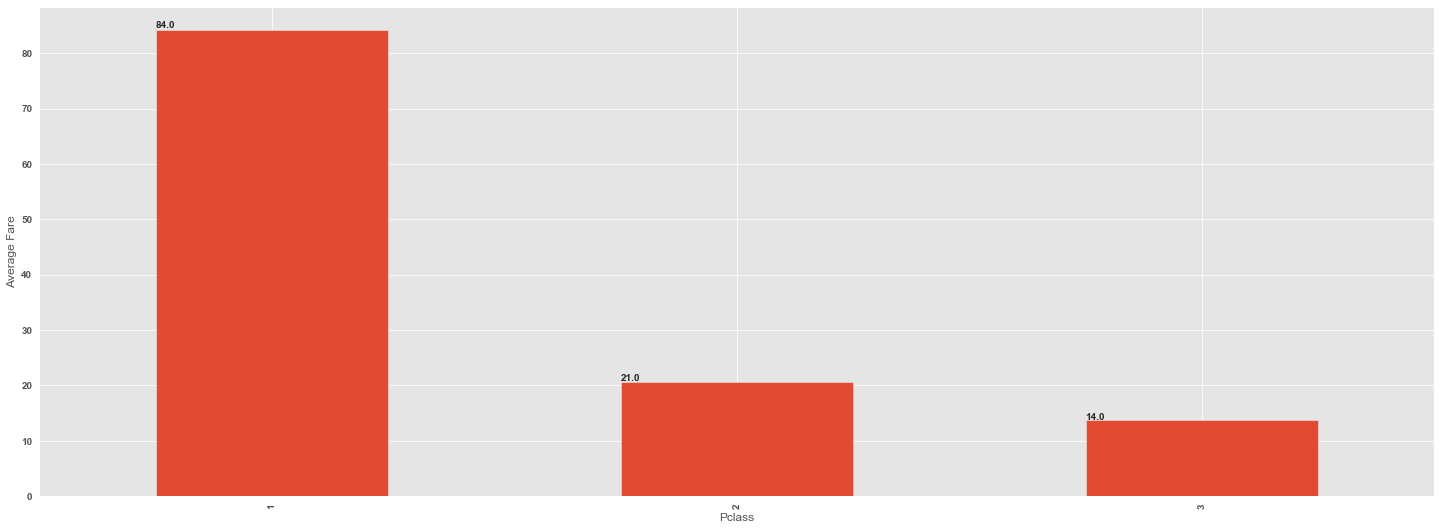

In [56]:
ax = plt.subplot()
ax.set_ylabel('Average Fare')
plt.style.use('ggplot')
df_Train.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 9), ax = ax)
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() * 1, p.get_height() * 1.005));

1等舱的平均票价约为84美元，2等舱平均票价约为21美元，3等舱平均票价为14美元

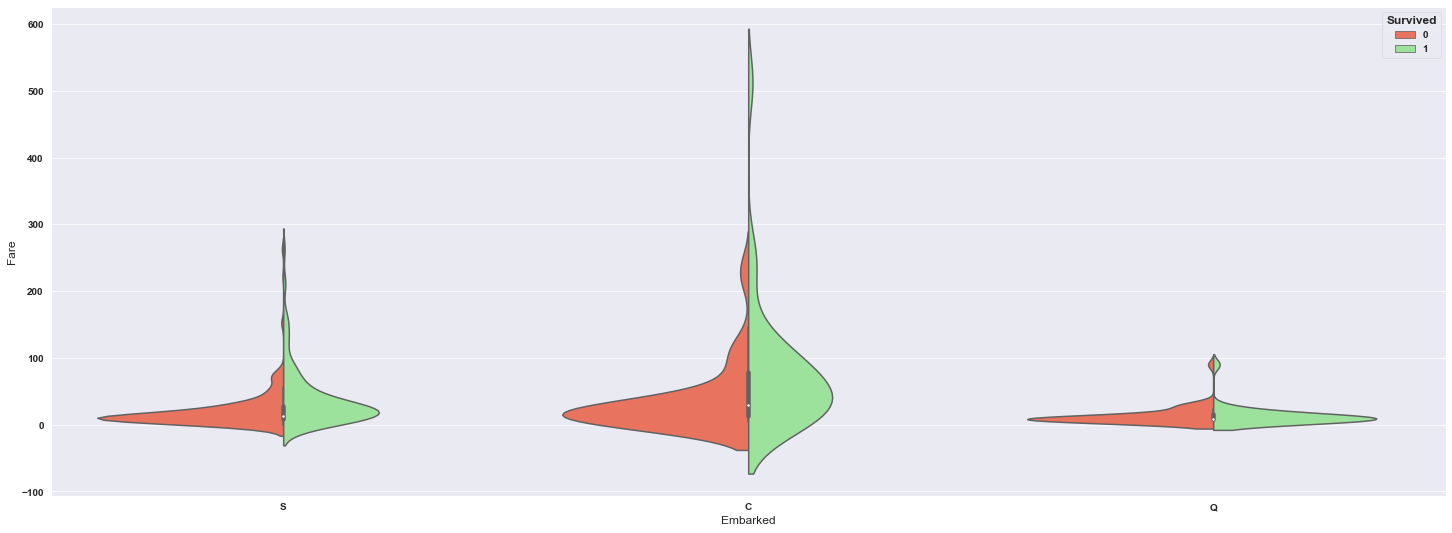

In [57]:
fig = plt.figure(figsize=(25, 9))
sns.set_style("darkgrid")
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=df_Train, split=True, palette={0: "tomato", 1: "lightgreen"});

相比与其他两个上船点，C点上船人的票价浮动最大切超过300美元的都存活了，且S的高价票持有者生存率也相比Q要高

确定了**阶级地位**对存活率确实有影响后，我们可以再来看看带有子女或其他家庭成员对生存率的影响，从客观来说好像很难找到其中的关系，所以我们还是来作图让数据更加直观的表现出来：

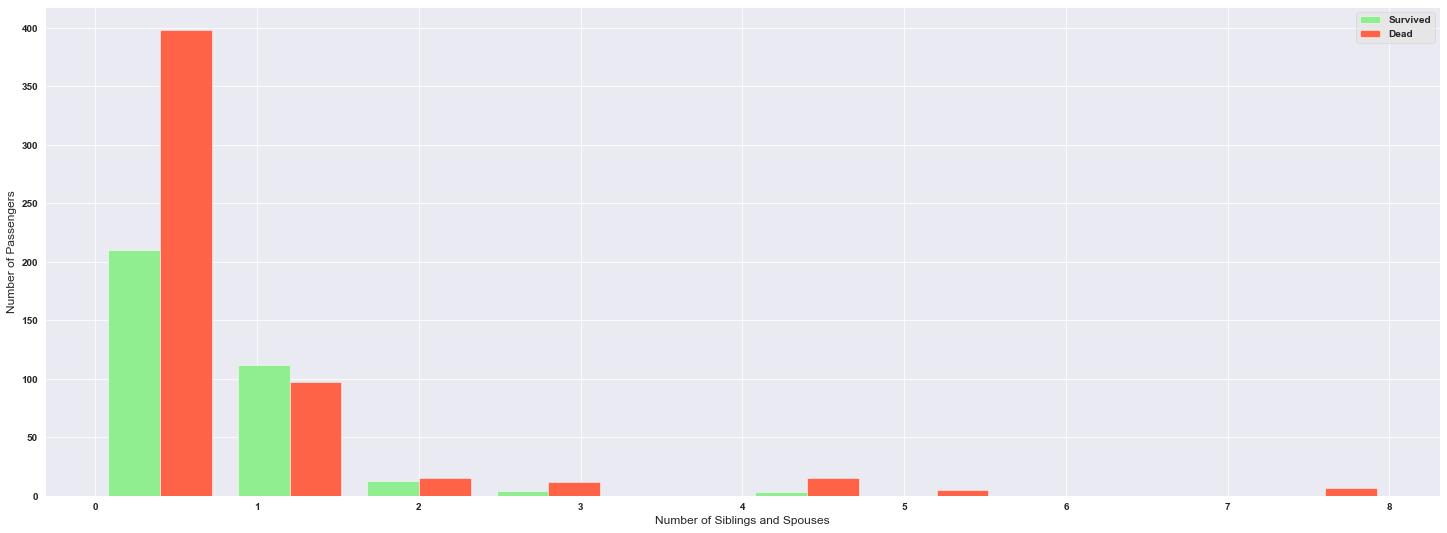

In [58]:
figure = plt.figure(figsize=(25, 9))
plt.hist([df_Train[df_Train['Survived'] == 1]['SibSp'], df_Train[df_Train['Survived'] == 0]['SibSp']], 
color = ['lightgreen','tomato'], label = ['Survived','Dead'])
plt.style.use('ggplot')
plt.xlabel('Number of Siblings and Spouses')
plt.ylabel('Number of Passengers')
plt.legend();

从图中我们可以发现：
* 除了有SibSp是1的，无论拥有几个兄弟姐妹及儿女，死亡率均超过50%
* 拥有超过两个兄弟姐妹及儿女的乘客生还率极低
* 船上和没有带兄弟姐妹或子女的人占大多数

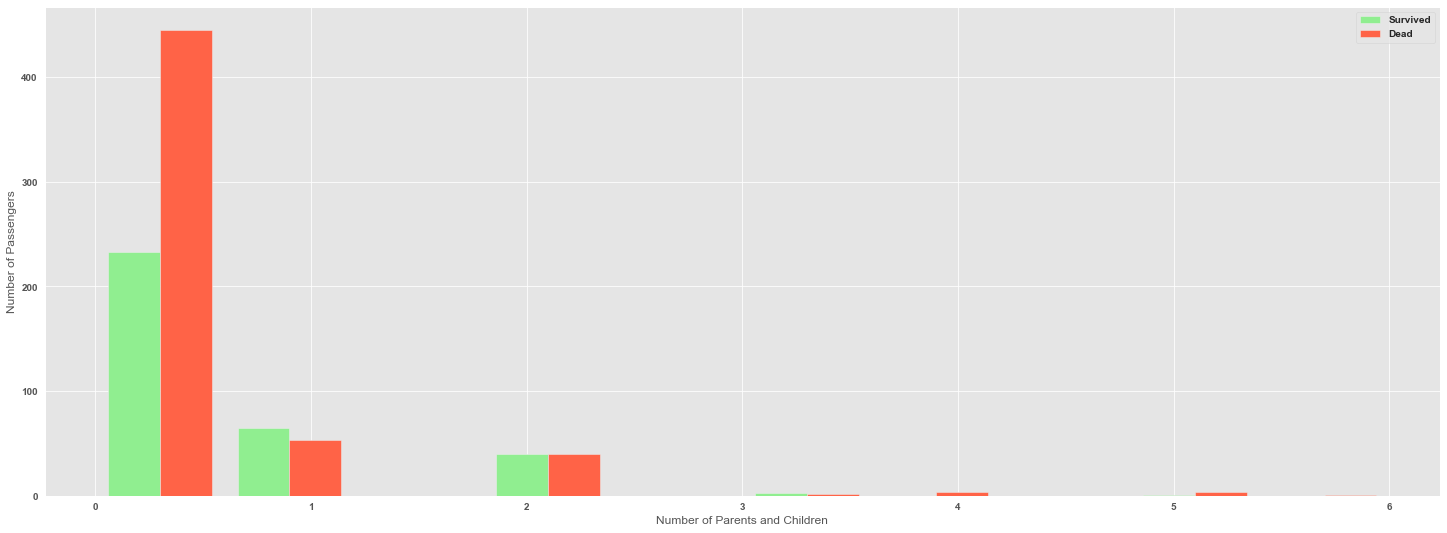

In [59]:
figure = plt.figure(figsize=(25, 9))
plt.hist([df_Train[df_Train['Survived'] == 1]['Parch'], df_Train[df_Train['Survived'] == 0]['Parch']], 
color = ['lightgreen','tomato'], label = ['Survived','Dead'])
plt.style.use('ggplot')
plt.xlabel('Number of Parents and Children')
plt.ylabel('Number of Passengers')
plt.legend();

从图中我们可以发现：
* 船上没带父母或孩子的占大多数
* 没带父母或孩子相比带了的存活率低很多

### 接下来我们为机器学习模型作准备： 
具体可以查看（https://github.com/ahmedbesbes/How-to-score-0.8134-in-Titanic-Kaggle-Challenge）

In [60]:
def get_combined_data():
    train = pd.read_csv('/Users/siteng/Documents/GitHub/Kaggle-Titanic/train.csv')   #提取训练数据
    test = pd.read_csv('/Users/siteng/Documents/GitHub/Kaggle-Titanic/test.csv')     #提取预测数据

    # 截取目标值
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # 结合两组数据并删除对模型无用的数据列
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

def status(feature):
    print ('Processing', feature, ': ok')

combined = get_combined_data()

我们可以对**名字**来进行进一步的分析与分组：

In [61]:
titles = set()
for name in df_Train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
#看下名字的开头头衔都有哪些
print (titles)

{'Miss', 'Ms', 'the Countess', 'Mrs', 'Don', 'Jonkheer', 'Master', 'Dr', 'Mlle', 'Major', 'Mme', 'Sir', 'Capt', 'Mr', 'Col', 'Rev', 'Lady'}


In [62]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"  
}
# 我们将所有头衔都列出来，并对其分组
# Royalty = 贵族, Officer = 船员, Master = 雇主, Mr = 男性, Mrs = 已婚女性, Miss = 未婚女性

def get_titles():
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip()) #将头衔从名字中提取
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [63]:
combined = get_titles()

Processing Title : ok


#### 虽然我们在数据可视化时对年龄数据做了处理，但我们可以通过各头衔/阶级的人加入比平均值/中位值更合理的数据

In [64]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [65]:
#看下结果
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [66]:
#我们来定义一个方法来补全年龄值
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global combined #利用全局combined值
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

combined = process_age()

Processing age : ok


由于我们已经对**姓名**进行分组，在机器学习模型中这一字段就不重要了，取而代之的，我们可以将每个头衔都加入数据中

In [67]:
#定义一个函数将名字去除,
def process_names():
    global combined
    combined.drop('Name', axis=1, inplace=True)
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')# 利用get_dummies将表填充
    combined = pd.concat([combined, titles_dummies], axis=1)
    combined.drop('Title', axis=1, inplace=True)                      #去除没用的列
    status('names')
    return combined
combined = process_names()
combined.head()

Processing names : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


接下来和之前一样，将船票的价钱利用**平均值**补全

In [68]:
def process_fares():
    global combined
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

combined = process_fares()

Processing fare : ok


由于上船点中缺失值并不多，我们可以把缺失值用出现**最频繁**的值补全

In [69]:
def process_embarked():
    global combined
    combined.Embarked.fillna('S', inplace=True)         #通过之前数据可视化时的分析，用出现最多的上船点补全缺失值
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

combined = process_embarked()
combined.head()

Processing embarked : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


对性别做同样的处理

In [70]:
def process_sex():
    global combined
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})  #将字符串改为整数
    status('Sex')
    return combined

combined = process_sex()
combined.head()

Processing Sex : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,0,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


In [71]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [72]:
def process_cabin():
    global combined    
    combined.Cabin.fillna('U', inplace=True)
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)
    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

combined = process_cabin()
combined.head()

Processing cabin : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,1,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


将票号的非数字去除

In [85]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [86]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [93]:
def process_ticket():
    
    global combined
    
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined


In [94]:
combined = process_ticket()

Processing Ticket : ok


对舱级做处理

In [73]:
def process_pclass():
    global combined
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    combined = pd.concat([combined, pclass_dummies],axis=1)
    combined.drop('Pclass',axis=1,inplace=True)
    status('Pclass')
    return combined

combined = process_pclass()

Processing Pclass : ok


对家庭也进行分组处理

In [74]:
def process_family():
    global combined
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)   
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    status('family')
    return combined

combined = process_family()

Processing family : ok


### 接下来我们可以开始数据建模：

In [120]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [121]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

#用于恢复原数据
def recover_train_test_target():
    global combined
    targets = pd.read_csv('/Users/siteng/Documents/GitHub/Kaggle-Titanic/train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    return train, test, targets

train, test, targets = recover_train_test_target()

In [122]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [123]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

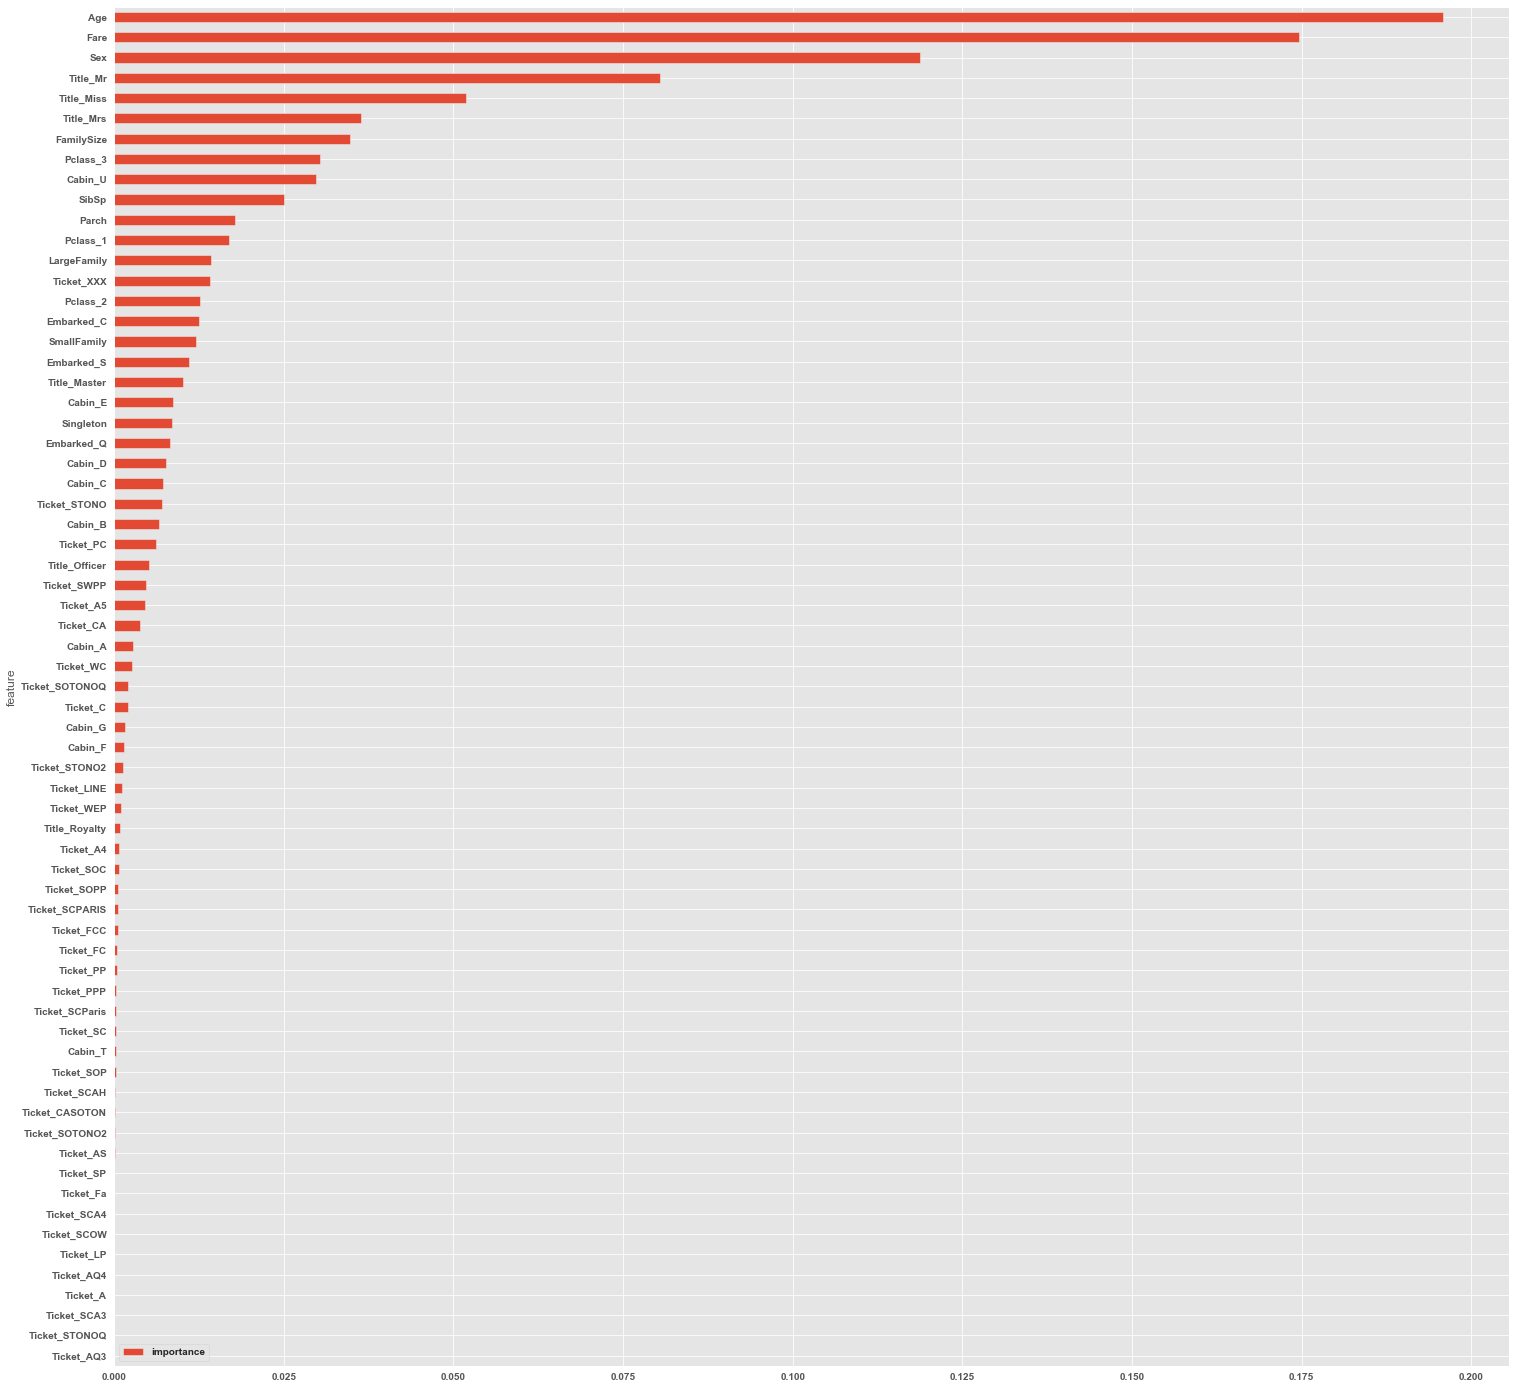

In [124]:
features.plot(kind='barh', figsize=(25, 25))

In [125]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
test_reduced = model.transform(test)

In [126]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()

models = [logreg, logreg_cv, rf]

In [131]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print ('CV score = {0}'.format(score))
    print ('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8181950977148273
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>


/Users/siteng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/siteng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/siteng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/siteng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/siteng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

CV score = 0.8159352107091777
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8182201350669395
****


/Users/siteng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/siteng/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/siteng/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/siteng/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/siteng/opt/anaconda3/lib/python3.7/site-packag